# Raster masking and cropping

Both used for unifying spatial extent of input data and reduce resource requirements.

Target and cropping objects must have same projection. It is better to reproject vector data.

In [11]:
from helpers import zion, src_srtm
import rasterio
import rasterio.mask

In [18]:
zion = zion.to_crs(src_srtm.crs)

>Masking

In [9]:
out_image_mask, out_transform_mask = (
    rasterio.mask.mask(
        src_srtm, 
        zion.geometry, 
        crop=False, 
        nodata=9999
    )
)

In [10]:
dst_kwargs = src_srtm.meta 
dst_kwargs.update(nodata=9999)
dst_kwargs

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 9999,
 'width': 465,
 'height': 457,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333332777796, 0.0, -113.23958321278403,
        0.0, -0.0008333333332777843, 37.512916763165805)}

In [12]:
new_dataset = rasterio.open('../output/srtm_masked.tif', 
                           'w', **dst_kwargs)

In [13]:
new_dataset.write(out_image_mask)
new_dataset.close()

In [14]:
src_srtm_mask = rasterio.open('../output/srtm_masked.tif')

In [15]:
src_srtm_mask.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 9999.0,
 'width': 465,
 'height': 457,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333332777796, 0.0, -113.23958321278403,
        0.0, -0.0008333333332777843, 37.512916763165805)}

>Cropping

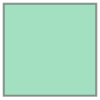

In [20]:
bb = zion.union_all().envelope
bb

In [21]:
out_image_crop, out_transform_crop = rasterio.mask.mask(
    src_srtm, 
    [bb], 
    crop=True, 
    all_touched=True, 
    nodata=9999
)

>Crop and mask

In [22]:
out_image_mask_crop, out_transform_mask_crop = \
    rasterio.mask.mask(
        src_srtm, 
        zion.geometry, 
        crop=True, 
        nodata=9999
    )

In [23]:
dst_kwargs = src_srtm.meta 
dst_kwargs.update({
    'nodata': 9999, 
    'transform': out_transform_mask_crop, 
    'width': out_image_mask_crop.shape[2], 
    'height': out_image_mask_crop.shape[1]
})
new_dataset = rasterio.open('../output/srtm_masked_cropped.tif', 
                           'w', 
                           **dst_kwargs)
new_dataset.write(out_image_mask_crop)
new_dataset.close()

In [24]:
src_srtm_mask_crop = rasterio.open('../output/srtm_masked_cropped.tif')

In [27]:
import matplotlib.pyplot as plt
import rasterio.plot

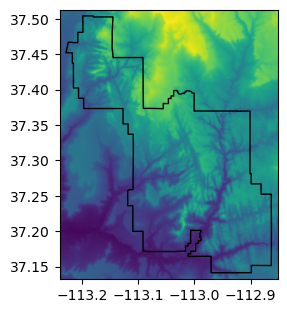

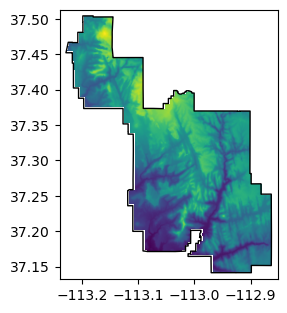

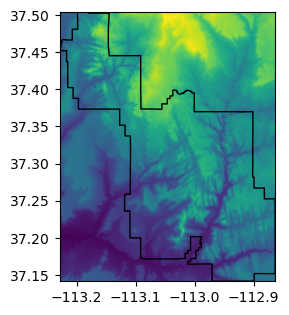

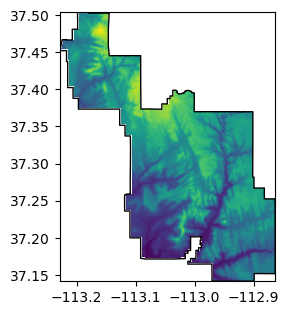

In [28]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
rasterio.plot.show(src_srtm, ax=ax)
zion.plot(ax=ax, color='none', edgecolor='black');
fig, ax = plt.subplots(figsize=(3.5, 3.5))
rasterio.plot.show(src_srtm_mask, ax=ax)
zion.plot(ax=ax, color='none', edgecolor='black');
fig, ax = plt.subplots(figsize=(3.5, 3.5))
rasterio.plot.show(out_image_crop, transform=out_transform_crop, ax=ax)
zion.plot(ax=ax, color='none', edgecolor='black');
fig, ax = plt.subplots(figsize=(3.5, 3.5))
rasterio.plot.show(src_srtm_mask_crop, ax=ax)
zion.plot(ax=ax, color='none', edgecolor='black');